# Problem Set 3

## Group 6 

# Exercise 1
### a) Generate the covariates from a multivariate normal distribution using the $\mu_k$ and $\Sigma$ as described above and an indicator variable indicating class dependece for $n$ observations and combine these in a data frame.

In [1]:
#install.packages("ROCR")
#install.packages("MASS")
#install.packages("mvtnorm")

set.seed(100)
library(ROCR)
library(MASS)
library(mvtnorm)
n_1 = 300 #Sample size of class 1
n_2 = 500 #Sample size of class 2
mu_1 = c(-3,3) #Mean vector for class 1
mu_2 = c(5,5)  #Mean vector for class 2
sigma = matrix(c(16,-2,-2,9),ncol=2,nrow=2) #VarCovariance matrix for class 1 and class 2
dataset = function(n_1,n_2,mu_1,mu_2,sigma){
X_Class1 = mvtnorm::rmvnorm(n_1,mu_1,sigma) #Multivariate normal distribution for class 1
X_Class2 = mvtnorm::rmvnorm(n_2,mu_2,sigma) #Multivariate normal distribution for class 1
Y = c(rep(0,n_1),rep(1,n_2)) #Indicator Variable where 0 is for 'Class 1' and 1 for 'Class 2'
data = data.frame(cbind(rbind(X_Class1,X_Class2),Y))
colnames(data)=c("X1","X2","Y")
return(data)
}
dataset.train = dataset(n_1,n_2,mu_1,mu_2,sigma) # Train dataset
dataset.test =  dataset(n_1,n_2,mu_1,mu_2,sigma) # Test dataset

Warning message:
"package 'ROCR' was built under R version 3.6.3"Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'mvtnorm' was built under R version 3.6.3"

### b) Calculate the linear discriminant analysis and the logistic regression model, estimating all relevant quantities.

#### LDA analysis:

Call:
lda(Y ~ ., data = dataset.train)

Prior probabilities of groups:
    0     1 
0.375 0.625 

Group means:
        X1       X2
0 -3.21166 3.102986
1  5.15561 4.982143

Coefficients of linear discriminants:
         LD1
X1 0.2485893
X2 0.1390715

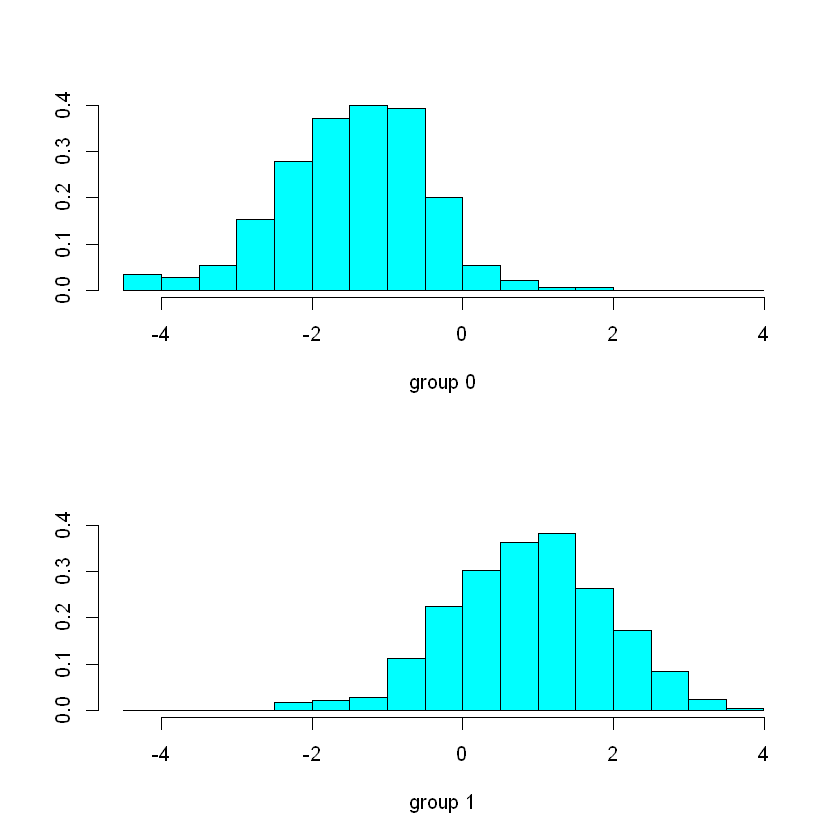

In [2]:
lda = lda(Y~.,data=dataset.train) #Train the model
lda
ldahist(data=predict(lda)$x,g=dataset.train$Y)

### Comment: 
In the above histograms, group 0 stands for class 1 and group 1 stands for class 2 of our simulation.

#### Logistic Regression: 

In [3]:
lr = glm(Y~.,family=binomial(link="logit"),data=dataset.train)
summary(lr)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = dataset.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2101  -0.2871   0.0862   0.3263   3.0724  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.50368    0.22565  -6.664 2.67e-11 ***
X1           0.61033    0.04544  13.432  < 2e-16 ***
X2           0.37269    0.04553   8.185 2.72e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1058.50  on 799  degrees of freedom
Residual deviance:  422.84  on 797  degrees of freedom
AIC: 428.84

Number of Fisher Scoring iterations: 6


### c) Calculate the mean training and test error for both methods and compare.

#### Comment:
Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. Each column of the matrix represents the instances in an actual class while each row represents the instances in a predicted class. In this question we used the sum of diagonal of the confusion matrix which are true negative and positive rate over the overall sum to find the accuracy rate for LDA and LR.


In [4]:
###Evaluate the performance of LDA###
Ypred.train.lda = predict(lda,dataset.train)
Ypred.test.lda = predict(lda,dataset.test)

#####Training Error###

confmatrix.train.lda = table(list(predicted=Ypred.train.lda$class,observed=dataset.train$Y))
colnames(confmatrix.train.lda)=c("No","Yes")
rownames(confmatrix.train.lda)=c("No","Yes")
#confmatrix.train.lda                                                             #Confusion Matrix
mean.trainaccuracy.lda=sum(diag(confmatrix.train.lda))/sum(confmatrix.train.lda) #Model Accuracy
mean.trainerror.lda = 1- mean.trainaccuracy.lda
#mean.trainerror.lda                                                              #Total Error rate

########Testing Error###

confmatrix.test.lda = table(list(predicted=Ypred.test.lda$class,observed=dataset.test$Y))
colnames(confmatrix.test.lda)=c("No","Yes")
rownames(confmatrix.test.lda)=c("No","Yes")
#confmatrix.test.lda                                                              #Confusion Matrix
mean.testaccuracy.lda=sum(diag(confmatrix.test.lda))/sum(confmatrix.test.lda)    #Model Accuracy
mean.testerror.lda = 1-mean.testaccuracy.lda
#mean.testerror.lda                                                               ##Total Error rate

###Evaluate the performance of LR###

Ypred.train.lr = predict(lr,dataset.train,type="response")
Ypred.train.lr = ifelse(Ypred.train.lr>0.5,1,0)
Ypred.test.lr = predict(lr,dataset.test,type="response")
Ypred.test.lr = ifelse(Ypred.test.lr>0.5,1,0)

###Training Error###

confmatrix.train.lr = table(list(predicted=Ypred.train.lr,observed=dataset.train$Y))
colnames(confmatrix.train.lr)=c("No","Yes")
rownames(confmatrix.train.lr)=c("No","Yes")
#confmatrix.train.lr                                                              #Confusion Matrix
mean.trainaccuracy.lr= sum(diag(confmatrix.train.lr))/sum(confmatrix.train.lr)   #Model Accuracy
mean.trainerror.lr=1-mean.trainaccuracy.lr
#mean.trainerror.lr                                                               #Total Error rate

###Testing Error###

confmatrix.test.lr = table(list(predicted=Ypred.test.lr,observed=dataset.test$Y))
colnames(confmatrix.test.lr)=c("No","Yes")
rownames(confmatrix.test.lr)=c("No","Yes")
#confmatrix.test.lr                                                               #Confusion Matrix
mean.testaccuracy.lr= sum(diag(confmatrix.test.lr))/sum(confmatrix.test.lr)      #Model accuracy
mean.testerror.lr = 1-mean.testaccuracy.lr                                       
#mean.testerror.lr                                                                #Total error rate

########Comparing test error of LDA and LR ###

compare.trainerror=ifelse(mean.trainerror.lda==mean.trainerror.lr,print(paste("Both training errors are of same value",mean.trainerror.lda)),
                   ifelse(mean.trainerror.lda>mean.trainerror.lr,print(paste("LDA train error",mean.trainerror.lda,"is larger than LR train error",mean.trainerror.lr)),
                   print(paste("LR train error",mean.trainerror.lr,"is larger than LDA train error",mean.trainerror.lda))))

compare.testerror=ifelse(mean.testerror.lda==mean.testerror.lr,print(paste("Both are of same value",mean.testerror.lda)),
                  ifelse(mean.testerror.lda>mean.testerror.lr,print(paste("LDA test error",mean.testerror.lda,"is larger than LR test error",mean.testerror.lr)),
                  print(paste("LR test error",mean.testerror.lr,"is larger than LDA test error",mean.testerror.lda))))



[1] "Both training errors are of same value 0.10625"
[1] "LR test error 0.1225 is larger than LDA test error 0.12"


### d) What other performance dimension could you analyze?

In [5]:

############## Model Accuracy ###

#accu.train = ifelse(mean.trainaccuracy.lda==mean.trainaccuracy.lr,print(paste("Both are of same value",mean.trainaccuracy.lda)),
#             ifelse(mean.trainaccuracy.lda>mean.trainaccuracy.lr,print(paste("LDA model predicts accuracy of",mean.trainaccuracy.lda,"which is more accuracte than LR model",mean.trainaccuracy.lr)),
#             print(paste("LR model",mean.trainaccuracy.lr,"is more accurate than LDA model",mean.trainaccuracy.lda))))

#accu.test =  ifelse(mean.testaccuracy.lda==mean.testaccuracy.lr,print(paste("Both are of same value",mean.testaccuracy.lda)),
#             ifelse(mean.testaccuracy.lda>mean.testaccuracy.lr,print(paste("LDA model predicts accuracy of",mean.testaccuracy.lda,"which is more accuracte than LR model",mean.testaccuracy.lr)),
#             print(paste("LR model",mean.testaccuracy.lr,"is more accurate than LDA model",mean.testaccuracy.lda))))

############# Sensitivity ###

sens.train.lda=diag(confmatrix.train.lda)[2]/colSums(confmatrix.train.lda)[2]
#sens.train.lda
sens.test.lda = diag(confmatrix.test.lda)[2]/colSums(confmatrix.test.lda)[2]
#sens.test.lda
sens.train.lr = diag(confmatrix.train.lr)[2]/colSums(confmatrix.train.lr)[2]
#sens.train.lr
sens.test.lr = diag(confmatrix.test.lr)[2]/colSums(confmatrix.test.lr)[2]
#sens.test.lr
#sens.train = c(sens.train.lda,sens.train.lr)
#sens.test = c(sens.test.lda,sens.test.lr)
#compare.sens=paste("Better sens.train is = ",max(sens.train)," and sens.test is = ",max(sens.test))
#compare.sens

########### Specificity ###

spec.train.lda=diag(confmatrix.train.lda)[1]/colSums(confmatrix.train.lda)[1]
#spec.train.lda
spec.test.lda = diag(confmatrix.test.lda)[1]/colSums(confmatrix.test.lda)[1]
#spec.test.lda
spec.train.lr = diag(confmatrix.train.lr)[1]/colSums(confmatrix.train.lr)[1]
#spec.train.lr
spec.test.lr = diag(confmatrix.test.lr)[1]/colSums(confmatrix.test.lr)[1]
#spec.test.lr
#spec.train = c(spec.train.lda,spec.train.lr)
#spec.test = c(spec.test.lda,spec.test.lr)
#compare.spec=paste("Better spec.train is = ",max(spec.train),"and better spec.test is = ",max(spec.test))
#compare.spec


############## ROC and AUC ###

pr.train.lda = prediction(Ypred.train.lda$posterior[,2],dataset.train$Y) 
ROC.train.lda = performance(pr.train.lda,measure="tpr",x.measure = "fpr")
#plot(ROC.train.lda,main="ROC Curve_train_LDA",col='blue')
#abline(a=0,b=1)
auc.train.lda = performance(pr.train.lda,measure="auc")
auc.train.lda = auc.train.lda@y.values[[1]]
#auc.train.lda

pr.test.lda = prediction(Ypred.test.lda$posterior[,2],dataset.test$Y) 
ROC.test.lda = performance(pr.test.lda,measure="tpr",x.measure = "fpr")
#plot(ROC.test.lda,main="ROC Curve_test_LDA",col="Red")
#abline(a=0,b=1)
auc.test.lda = performance(pr.test.lda,measure="auc")
auc.test.lda = auc.test.lda@y.values[[1]]
#auc.test.lda

pr.train.lr = prediction(Ypred.train.lr,dataset.train$Y) 
ROC.train.lr = performance(pr.train.lr,measure="tpr",x.measure = "fpr")
#plot(ROC.train.lr,main="ROC Curve_train_LR",col='blue')
#abline(a=0,b=1)
auc.train.lr = performance(pr.train.lr,measure="auc")
auc.train.lr = auc.train.lr@y.values[[1]]
#auc.train.lr

pr.test.lr = prediction(Ypred.test.lr,dataset.test$Y) 
ROC.test.lr = performance(pr.test.lr,measure="tpr",x.measure = "fpr")
#plot(ROC.test.lr,main="ROC Curve_test_LR",col="Red")
#abline(a=0,b=1)
auc.test.lr = performance(pr.test.lr,measure="auc")
auc.test.lr = auc.test.lr@y.values[[1]]
#auc.test.lr

#auc.train=c(auc.train.lda,auc.train.lr)
#auc.test=c(auc.test.lda,auc.test.lr)
#compare.auc = paste("Better auc.train is = ",max(auc.train),"and better auc.test is = ",max(auc.test))
#compare.auc

################ Evaluation Summary ###

Evaluation.table = rbind(c(mean.trainerror.lda,mean.trainaccuracy.lda,sens.train.lda,spec.train.lda,auc.train.lda),
                         c(mean.trainerror.lr,mean.trainaccuracy.lr,sens.train.lr,spec.train.lr,auc.train.lr),
                         c(mean.testerror.lda,mean.testaccuracy.lda,sens.test.lda,spec.test.lda,auc.test.lda),
                         c(mean.testerror.lr,mean.testaccuracy.lr,sens.test.lr,spec.test.lr,auc.test.lr))
colnames(Evaluation.table) = c("Total Error Rate","Accuracy Rate","Sensitivity Rate","Specificity Rate","Area Under the Curve")
rownames(Evaluation.table) = c("Train LDA","Train LR","Test LDA","Test LR")
Evaluation.table


,Total Error Rate,Accuracy Rate,Sensitivity Rate,Specificity Rate,Area Under the Curve
Train LDA,0.10625,0.89375,0.916,0.8566667,0.9550933
Train LR,0.10625,0.89375,0.924,0.8433333,0.8836667
Test LDA,0.12000,0.88000,0.912,0.8266667,0.9464667
Test LR,0.12250,0.87750,0.916,0.8133333,0.8646667


### Comment: 
In large sample size, logistic regression (LR) performs almost the same as linear discriminant analysis LDA. 

In [6]:
head("Confusion Matrix_Train_LDA")
confmatrix.train.lda
head("Confusion Matrix_Train_LR")
confmatrix.train.lr
head("Confusion Matrix_Test_LDA")
confmatrix.test.lda
head("Confusion Matrix_Test_LR")
confmatrix.test.lr

[1] "Confusion Matrix_Train_LDA"

         observed
predicted  No Yes
      No  257  42
      Yes  43 458

[1] "Confusion Matrix_Train_LR"

         observed
predicted  No Yes
      No  253  38
      Yes  47 462

[1] "Confusion Matrix_Test_LDA"

         observed
predicted  No Yes
      No  248  44
      Yes  52 456

[1] "Confusion Matrix_Test_LR"

         observed
predicted  No Yes
      No  244  42
      Yes  56 458

### Comment: 
Sensitivity - True positive rate: the fraction of class 2 that are correctly identified using a given threshold value.

Specificity - True negative rate : the fraction of non-class 2 (class 1) that we classify correctly identify non-class 2 (class 1).

Sensitivity and specificity could be changed by the threshold of posterior probability.

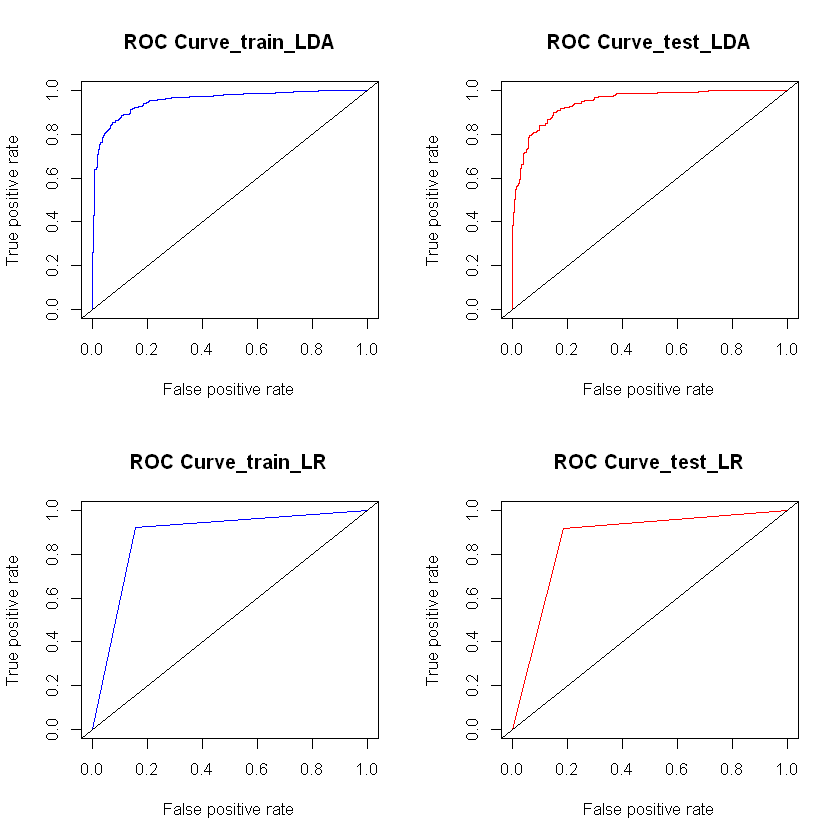

In [7]:
ROC = par(mfrow=c(2,2))
plot(ROC.train.lda,main="ROC Curve_train_LDA",col='blue')
abline(a=0,b=1)
plot(ROC.test.lda,main="ROC Curve_test_LDA",col="Red")
abline(a=0,b=1)
plot(ROC.train.lr,main="ROC Curve_train_LR",col='blue')
abline(a=0,b=1)
plot(ROC.test.lr,main="ROC Curve_test_LR",col="Red")
abline(a=0,b=1)


### Comment: 
Roc curve for the LDA classifier on the class 2. ROC is graphed out as TPR against FPR. The ideal ROC curve hugs the top left corner indicating a high true positive rate and a low false positive rate. The 45 degree line represents the “no information” classifier. The overall performance of a classifier summarized over all possible thresholds is given by the area under the ROC curve AUC. AUC is between 0.5 and 1. Higher the AUC, better the model.  

# Exercise 2
### a) Evaluate the difference between the two methods through calculating classification training and test error in a simulation study for $100$ different samples. What are other statistic could we consider? 

In [8]:
set.seed(100)
library(ROCR)
library(MASS)
library(mvtnorm)
n_1 = 50 #Sample size of class 1
n_2 = 50 #Sample size of class 2
mu_1 = c(-3,3) #Mean vector for class 1
mu_2 = c(5,5)  #Mean vector for class 2
sigma = matrix(c(16,-2,-2,9),ncol=2,nrow=2) #VarCovariance matrix for class 1 and class 2
dataset = function(n_1,n_2,mu_1,mu_2,sigma){
  X_Class1 = mvtnorm::rmvnorm(n_1,mu_1,sigma) #Multivariate normal distribution for class 1
  X_Class2 = mvtnorm::rmvnorm(n_2,mu_2,sigma) #Multivariate normal distribution for class 1
  Y = c(rep(0,n_1),rep(1,n_2)) #Indicator Variable where '0' is for 'Class 1' and '1' is for 'Class 2'
  data = data.frame(cbind(rbind(X_Class1,X_Class2),Y))
  colnames(data)=c("X1","X2","Y")
  return(data)
}
dataset.train = dataset(n_1,n_2,mu_1,mu_2,sigma)
dataset.test =  dataset(n_1,n_2,mu_1,mu_2,sigma)

lda = lda(Y~.,data=dataset.train) #Train the model
lda


Call:
lda(Y ~ ., data = dataset.train)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
         X1       X2
0 -4.332835 4.036208
1  4.922649 5.120851

Coefficients of linear discriminants:
         LD1
X1 0.3167521
X2 0.1026341

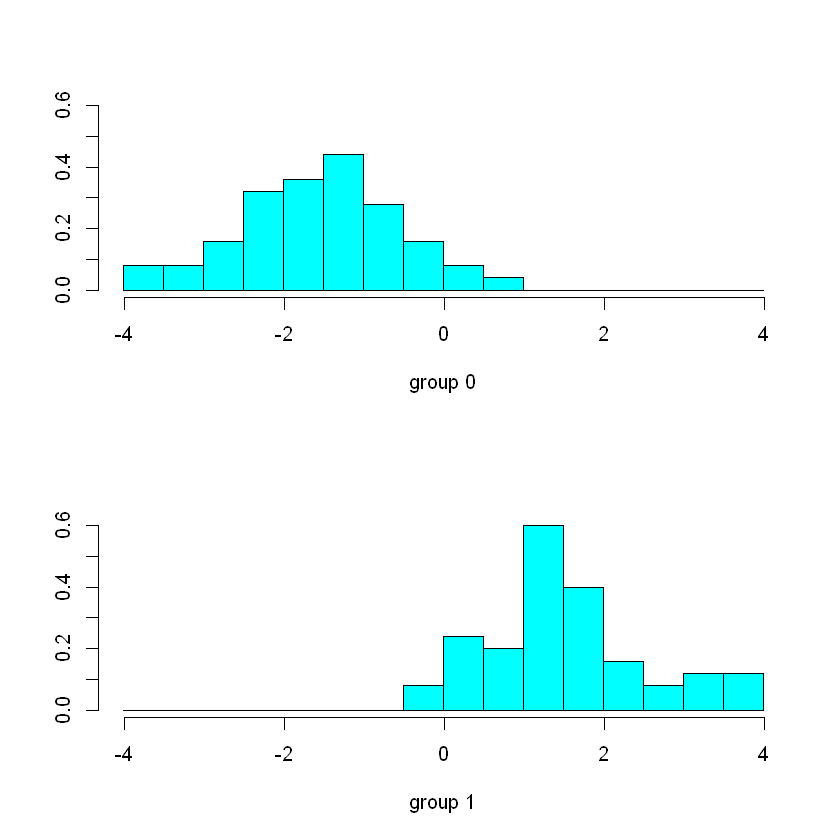

In [9]:
ldahist(data=predict(lda)$x,g=dataset.train$Y)

### Comment: 
In the above histograms, group 0 stands for class 1 and group 1 stands for class 2 of our simulation.

In [10]:
lr = glm(Y~.,family=binomial(link="logit"),data=dataset.train)
summary(lr)



Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = dataset.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.40116  -0.12531  -0.00026   0.09737   1.91278  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.5477     1.0632  -2.396   0.0166 *  
X1            1.0836     0.2645   4.097 4.19e-05 ***
X2            0.5123     0.2258   2.269   0.0233 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  27.254  on 97  degrees of freedom
AIC: 33.254

Number of Fisher Scoring iterations: 8


In [11]:

###Evaluate the performance of LDA###

Ypred.train.lda = predict(lda,dataset.train)
Ypred.test.lda = predict(lda,dataset.test)

###Training Error###

confmatrix.train.lda = table(list(predicted=Ypred.train.lda$class,observed=dataset.train$Y))
colnames(confmatrix.train.lda)=c("No","Yes")
rownames(confmatrix.train.lda)=c("No","Yes")
mean.trainaccuracy.lda=sum(diag(confmatrix.train.lda))/sum(confmatrix.train.lda) #Model Accuracy
mean.trainerror.lda = 1- mean.trainaccuracy.lda

####Testing Error###

confmatrix.test.lda = table(list(predicted=Ypred.test.lda$class,observed=dataset.test$Y))
colnames(confmatrix.test.lda)=c("No","Yes")
rownames(confmatrix.test.lda)=c("No","Yes")
mean.testaccuracy.lda=sum(diag(confmatrix.test.lda))/sum(confmatrix.test.lda)    #Model Accuracy
mean.testerror.lda = 1-mean.testaccuracy.lda

###Evaluate the performance of LR###

Ypred.train.lr = predict(lr,dataset.train,type="response")
Ypred.train.lr = ifelse(Ypred.train.lr>0.5,1,0)
Ypred.test.lr = predict(lr,dataset.test,type="response")
Ypred.test.lr = ifelse(Ypred.test.lr>0.5,1,0)

####Training Error###

confmatrix.train.lr = table(list(predicted=Ypred.train.lr,observed=dataset.train$Y))
colnames(confmatrix.train.lr)=c("No","Yes")
rownames(confmatrix.train.lr)=c("No","Yes")
mean.trainaccuracy.lr= sum(diag(confmatrix.train.lr))/sum(confmatrix.train.lr)   #Model Accuracy
mean.trainerror.lr=1-mean.trainaccuracy.lr

####Testing Error###

confmatrix.test.lr = table(list(predicted=Ypred.test.lr,observed=dataset.test$Y))
colnames(confmatrix.test.lr)=c("No","Yes")
rownames(confmatrix.test.lr)=c("No","Yes")
mean.testaccuracy.lr= sum(diag(confmatrix.test.lr))/sum(confmatrix.test.lr)      #Model accuracy
mean.testerror.lr = 1-mean.testaccuracy.lr                                       

####Sensitivity### 

sens.train.lda=diag(confmatrix.train.lda)[2]/colSums(confmatrix.train.lda)[2]
sens.test.lda = diag(confmatrix.test.lda)[2]/colSums(confmatrix.test.lda)[2]
sens.train.lr = diag(confmatrix.train.lr)[2]/colSums(confmatrix.train.lr)[2]
sens.test.lr = diag(confmatrix.test.lr)[2]/colSums(confmatrix.test.lr)[2]

#####Specificity###

spec.train.lda=diag(confmatrix.train.lda)[1]/colSums(confmatrix.train.lda)[1]
spec.test.lda = diag(confmatrix.test.lda)[1]/colSums(confmatrix.test.lda)[1]
spec.train.lr = diag(confmatrix.train.lr)[1]/colSums(confmatrix.train.lr)[1]
spec.test.lr = diag(confmatrix.test.lr)[1]/colSums(confmatrix.test.lr)[1]

#####ROC and AUC###

pr.train.lda = prediction(Ypred.train.lda$posterior[,2],dataset.train$Y) 
ROC.train.lda = performance(pr.train.lda,measure="tpr",x.measure = "fpr")
auc.train.lda = performance(pr.train.lda,measure="auc")
auc.train.lda = auc.train.lda@y.values[[1]]

pr.test.lda = prediction(Ypred.test.lda$posterior[,2],dataset.test$Y) 
ROC.test.lda = performance(pr.test.lda,measure="tpr",x.measure = "fpr")
auc.test.lda = performance(pr.test.lda,measure="auc")
auc.test.lda = auc.test.lda@y.values[[1]]

pr.train.lr = prediction(Ypred.train.lr,dataset.train$Y) 
ROC.train.lr = performance(pr.train.lr,measure="tpr",x.measure = "fpr")
auc.train.lr = performance(pr.train.lr,measure="auc")
auc.train.lr = auc.train.lr@y.values[[1]]

pr.test.lr = prediction(Ypred.test.lr,dataset.test$Y) 
ROC.test.lr = performance(pr.test.lr,measure="tpr",x.measure = "fpr")
auc.test.lr = performance(pr.test.lr,measure="auc")
auc.test.lr = auc.test.lr@y.values[[1]]

#####Evaluation Summary###

Evaluation.table = rbind(c(mean.trainerror.lda,mean.trainaccuracy.lda,sens.train.lda,spec.train.lda,auc.train.lda),
                         c(mean.trainerror.lr,mean.trainaccuracy.lr,sens.train.lr,spec.train.lr,auc.train.lr),
                         c(mean.testerror.lda,mean.testaccuracy.lda,sens.test.lda,spec.test.lda,auc.test.lda),
                         c(mean.testerror.lr,mean.testaccuracy.lr,sens.test.lr,spec.test.lr,auc.test.lr))
colnames(Evaluation.table) = c("Total Error Rate","Accuracy Rate","Sensitivity Rate","Specificity Rate","Area Under the Curve")
rownames(Evaluation.table) = c("Train LDA","Train LR","Test LDA","Test LR")
head("Evaluation.table")
Evaluation.table



[1] "Evaluation.table"

,Total Error Rate,Accuracy Rate,Sensitivity Rate,Specificity Rate,Area Under the Curve
Train LDA,0.05,0.95,0.96,0.94,0.9880
Train LR,0.06,0.94,0.94,0.94,0.9400
Test LDA,0.12,0.88,0.86,0.90,0.9248
Test LR,0.13,0.87,0.86,0.88,0.8700


In [12]:
head("Confusion Matrix_Train_LDA")
confmatrix.train.lda
head("Confusion Matrix_Train_LR")
confmatrix.train.lr
head("Confusion Matrix_Test_LDA")
confmatrix.test.lda
head("Confusion Matrix_Test_LR")
confmatrix.test.lr

[1] "Confusion Matrix_Train_LDA"

         observed
predicted No Yes
      No  47   2
      Yes  3  48

[1] "Confusion Matrix_Train_LR"

         observed
predicted No Yes
      No  47   3
      Yes  3  47

[1] "Confusion Matrix_Test_LDA"

         observed
predicted No Yes
      No  45   7
      Yes  5  43

[1] "Confusion Matrix_Test_LR"

         observed
predicted No Yes
      No  44   7
      Yes  6  43

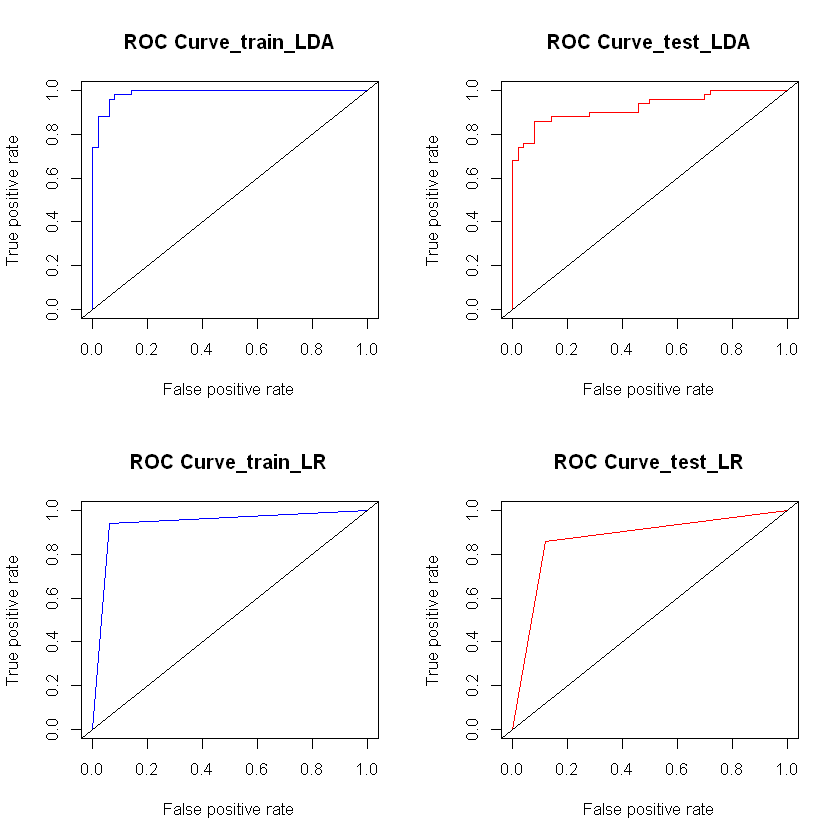

In [13]:
ROC = par(mfrow=c(2,2))
plot(ROC.train.lda,main="ROC Curve_train_LDA",col='blue')
abline(a=0,b=1)
plot(ROC.test.lda,main="ROC Curve_test_LDA",col="Red")
abline(a=0,b=1)
plot(ROC.train.lr,main="ROC Curve_train_LR",col='blue')
abline(a=0,b=1)
plot(ROC.test.lr,main="ROC Curve_test_LR",col="Red")
abline(a=0,b=1)


### b) Consider the differences in the objective of both lda and the logit model. Test your intuition by performing a suitable simulation study and manipulating the dfp above to increase or decrease the advantage of the lda. 

Call:
lda(Y ~ ., data = dataset.train1)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
         X1       X2
0 -3.012088 3.038154
1  5.047855 5.016765

Coefficients of linear discriminants:
         LD1
X1 0.2468705
X2 0.1456418

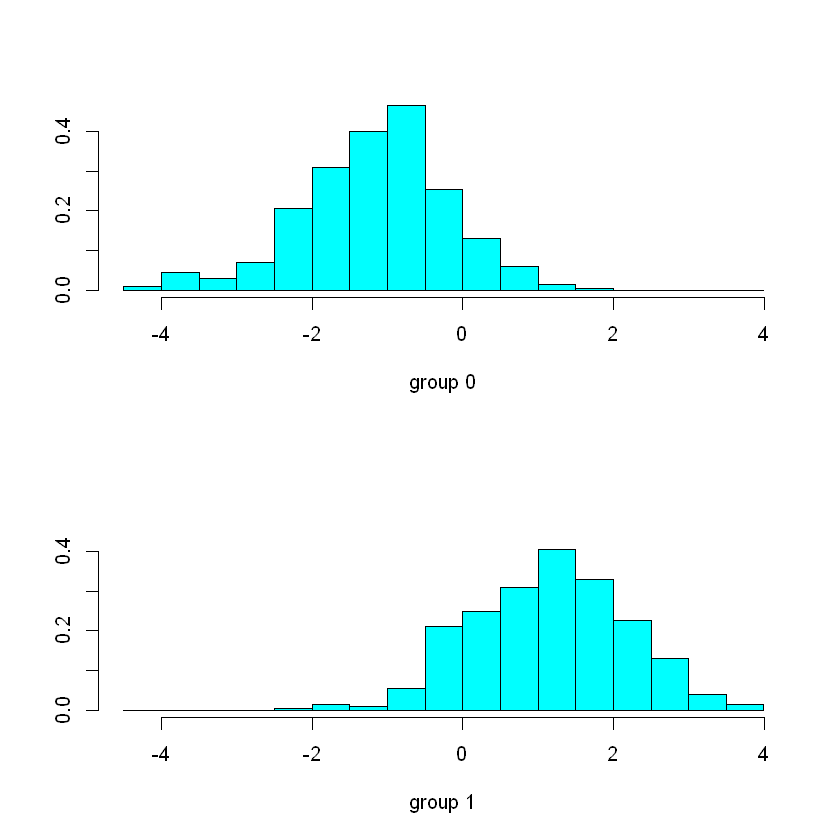

In [14]:
set.seed(100)
dataset.train1 = dataset(n_1=400,n_2=400,mu_1,mu_2,sigma)
dataset.test1 =  dataset(n_1=400,n_2=400,mu_1,mu_2,sigma)

lda1 = lda(Y~.,data=dataset.train1) #Train the model
lda1
ldahist(data=predict(lda1)$x,g=dataset.train1$Y)

In [15]:
lr1 = glm(Y~.,family=binomial(link="logit"),data=dataset.train1)
summary(lr1)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = dataset.train1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.99533  -0.39637   0.00217   0.33018   3.15123  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.04928    0.22666  -9.041   <2e-16 ***
X1           0.59266    0.04288  13.822   <2e-16 ***
X2           0.37764    0.04393   8.596   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1109.04  on 799  degrees of freedom
Residual deviance:  458.16  on 797  degrees of freedom
AIC: 464.16

Number of Fisher Scoring iterations: 6


In [16]:
###Evaluate the performance of LDA###

Ypred.train.lda1 = predict(lda1,dataset.train1)
Ypred.test.lda1 = predict(lda1,dataset.test1)

#####Training Error###

confmatrix.train.lda1 = table(list(predicted=Ypred.train.lda1$class,observed=dataset.train1$Y))
colnames(confmatrix.train.lda1)=c("No","Yes")
rownames(confmatrix.train.lda1)=c("No","Yes")
mean.trainaccuracy.lda1=sum(diag(confmatrix.train.lda1))/sum(confmatrix.train.lda1) #Model Accuracy
mean.trainerror.lda1 = 1- mean.trainaccuracy.lda1

####Testing Error###

confmatrix.test.lda1 = table(list(predicted=Ypred.test.lda1$class,observed=dataset.test1$Y))
colnames(confmatrix.test.lda1)=c("No","Yes")
rownames(confmatrix.test.lda1)=c("No","Yes")
mean.testaccuracy.lda1=sum(diag(confmatrix.test.lda1))/sum(confmatrix.test.lda1)    #Model Accuracy
mean.testerror.lda1 = 1-mean.testaccuracy.lda1

###Evaluate the performance of LR###

Ypred.train.lr1 = predict(lr1,dataset.train1,type="response")
Ypred.train.lr1 = ifelse(Ypred.train.lr1>0.5,1,0)
Ypred.test.lr1 = predict(lr1,dataset.test1,type="response")
Ypred.test.lr1 = ifelse(Ypred.test.lr1>0.5,1,0)

###Training Error###

confmatrix.train.lr1 = table(list(predicted=Ypred.train.lr1,observed=dataset.train1$Y))
colnames(confmatrix.train.lr1)=c("No","Yes")
rownames(confmatrix.train.lr1)=c("No","Yes")
mean.trainaccuracy.lr1= sum(diag(confmatrix.train.lr1))/sum(confmatrix.train.lr1)   #Model Accuracy
mean.trainerror.lr1=1-mean.trainaccuracy.lr1

####Testing Error###

confmatrix.test.lr1 = table(list(predicted=Ypred.test.lr1,observed=dataset.test1$Y))
colnames(confmatrix.test.lr1)=c("No","Yes")
rownames(confmatrix.test.lr1)=c("No","Yes")
mean.testaccuracy.lr1= sum(diag(confmatrix.test.lr1))/sum(confmatrix.test.lr1)      #Model accuracy
mean.testerror.lr1 = 1-mean.testaccuracy.lr1                                       

####Sensitivity### 

sens.train.lda1=diag(confmatrix.train.lda1)[2]/colSums(confmatrix.train.lda1)[2]
sens.test.lda1 = diag(confmatrix.test.lda1)[2]/colSums(confmatrix.test.lda1)[2]
sens.train.lr1 = diag(confmatrix.train.lr1)[2]/colSums(confmatrix.train.lr1)[2]
sens.test.lr1 = diag(confmatrix.test.lr1)[2]/colSums(confmatrix.test.lr1)[2]

####Specificity###

spec.train.lda1=diag(confmatrix.train.lda1)[1]/colSums(confmatrix.train.lda1)[1]
spec.test.lda1 = diag(confmatrix.test.lda1)[1]/colSums(confmatrix.test.lda1)[1]
spec.train.lr1 = diag(confmatrix.train.lr1)[1]/colSums(confmatrix.train.lr1)[1]
spec.test.lr1 = diag(confmatrix.test.lr1)[1]/colSums(confmatrix.test.lr1)[1]

####ROC and AUC###

pr.train.lda1 = prediction(Ypred.train.lda1$posterior[,2],dataset.train1$Y) 
ROC.train.lda1 = performance(pr.train.lda1,measure="tpr",x.measure = "fpr")
auc.train.lda1 = performance(pr.train.lda1,measure="auc")
auc.train.lda1 = auc.train.lda1@y.values[[1]]

pr.test.lda1 = prediction(Ypred.test.lda1$posterior[,2],dataset.test1$Y) 
ROC.test.lda1 = performance(pr.test.lda1,measure="tpr",x.measure = "fpr")
auc.test.lda1 = performance(pr.test.lda1,measure="auc")
auc.test.lda1 = auc.test.lda1@y.values[[1]]

pr.train.lr1 = prediction(Ypred.train.lr1,dataset.train1$Y) 
ROC.train.lr1 = performance(pr.train.lr1,measure="tpr",x.measure = "fpr")
auc.train.lr1 = performance(pr.train.lr1,measure="auc")
auc.train.lr1 = auc.train.lr1@y.values[[1]]

pr.test.lr1 = prediction(Ypred.test.lr1,dataset.test1$Y) 
ROC.test.lr1 = performance(pr.test.lr1,measure="tpr",x.measure = "fpr")
auc.test.lr1 = performance(pr.test.lr1,measure="auc")
auc.test.lr1 = auc.test.lr1@y.values[[1]]

####Evaluation Summary###

Evaluation.table1 = rbind(c(mean.trainerror.lda1,mean.trainaccuracy.lda1,sens.train.lda1,spec.train.lda1,auc.train.lda1),
                          c(mean.trainerror.lr1,mean.trainaccuracy.lr1,sens.train.lr1,spec.train.lr1,auc.train.lr1),
                          c(mean.testerror.lda1,mean.testaccuracy.lda1,sens.test.lda1,spec.test.lda1,auc.test.lda1),
                          c(mean.testerror.lr1,mean.testaccuracy.lr1,sens.test.lr1,spec.test.lr1,auc.test.lr1))
colnames(Evaluation.table1) = c("Total Error Rate","Accuracy Rate","Sensitivity Rate","Specificity Rate","Area Under the Curve")
rownames(Evaluation.table1) = c("Train LDA","Train LR","Test LDA","Test LR")
head("Evaluation.table1")
Evaluation.table1


[1] "Evaluation.table1"

,Total Error Rate,Accuracy Rate,Sensitivity Rate,Specificity Rate,Area Under the Curve
Train LDA,0.12625,0.87375,0.8525,0.8950,0.9503562
Train LR,0.12375,0.87625,0.8625,0.8900,0.8762500
Test LDA,0.13375,0.86625,0.8725,0.8600,0.9468125
Test LR,0.13125,0.86875,0.8850,0.8525,0.8687500


In [17]:
head("Evaluation.table")
Evaluation.table

[1] "Evaluation.table"

,Total Error Rate,Accuracy Rate,Sensitivity Rate,Specificity Rate,Area Under the Curve
Train LDA,0.05,0.95,0.96,0.94,0.9880
Train LR,0.06,0.94,0.94,0.94,0.9400
Test LDA,0.12,0.88,0.86,0.90,0.9248
Test LR,0.13,0.87,0.86,0.88,0.8700


In [18]:
head("Confusion Matrix_Train_LDA1")
confmatrix.train.lda1
head("Confusion Matrix_Train_LR1")
confmatrix.train.lr1
head("Confusion Matrix_Test_LDA1")
confmatrix.test.lda1
head("Confusion Matrix_Test_LR1")
confmatrix.test.lr1

[1] "Confusion Matrix_Train_LDA1"

         observed
predicted  No Yes
      No  358  59
      Yes  42 341

[1] "Confusion Matrix_Train_LR1"

         observed
predicted  No Yes
      No  356  55
      Yes  44 345

[1] "Confusion Matrix_Test_LDA1"

         observed
predicted  No Yes
      No  344  51
      Yes  56 349

[1] "Confusion Matrix_Test_LR1"

         observed
predicted  No Yes
      No  341  46
      Yes  59 354

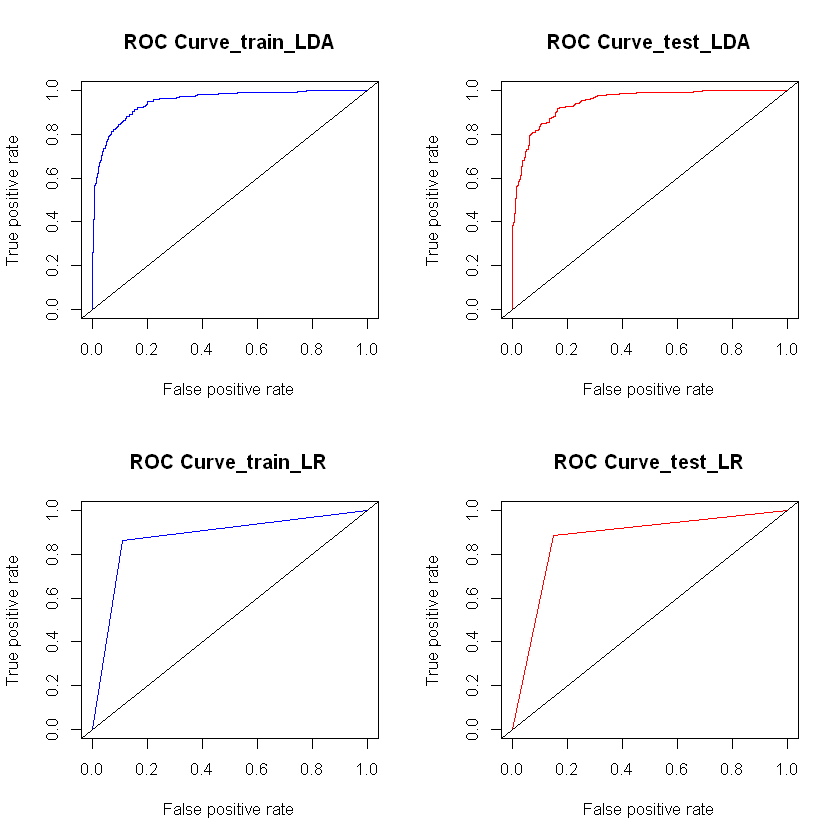

In [19]:
ROC1 = par(mfrow=c(2,2))
plot(ROC.train.lda1,main="ROC Curve_train_LDA",col='blue')
abline(a=0,b=1)
plot(ROC.test.lda1,main="ROC Curve_test_LDA",col="Red")
abline(a=0,b=1)
plot(ROC.train.lr1,main="ROC Curve_train_LR",col='blue')
abline(a=0,b=1)
plot(ROC.test.lr1,main="ROC Curve_test_LR",col="Red")
abline(a=0,b=1)

### c) Design a simulation study where you illustrate the problem with reducing the total error vs. sensitivity and specificity by manipulating the relevant quantities in the initial simulation set-up.

In [20]:
####Adjust the threshold level###

train.lda.adj = ifelse(Ypred.train.lda$posterior[,2]>0.2,1,0)
test.lda.adj = ifelse(Ypred.test.lda$posterior[,2]>0.2,1,0)

###Training Error###

confmatrix.train.lda.adj = table(list(predicted=train.lda.adj,observed=dataset.train$Y))
colnames(confmatrix.train.lda.adj)=c("No","Yes")
rownames(confmatrix.train.lda.adj)=c("No","Yes")
mean.trainaccuracy.lda.adj=sum(diag(confmatrix.train.lda.adj))/sum(confmatrix.train.lda.adj) #Model Accuracy
mean.trainerror.lda.adj = 1- mean.trainaccuracy.lda.adj

###Testing Error###

confmatrix.test.lda.adj = table(list(predicted=test.lda.adj,observed=dataset.test$Y))
colnames(confmatrix.test.lda.adj)=c("No","Yes")
rownames(confmatrix.test.lda.adj)=c("No","Yes")
mean.testaccuracy.lda.adj=sum(diag(confmatrix.test.lda.adj))/sum(confmatrix.test.lda.adj)    #Model Accuracy
mean.testerror.lda.adj = 1-mean.testaccuracy.lda.adj

####Sensitivity ###

sens.train.lda.adj=diag(confmatrix.train.lda.adj)[2]/colSums(confmatrix.train.lda.adj)[2]
sens.test.lda.adj = diag(confmatrix.test.lda.adj)[2]/colSums(confmatrix.test.lda.adj)[2]

###Specificity###

spec.train.lda.adj=diag(confmatrix.train.lda.adj)[1]/colSums(confmatrix.train.lda.adj)[1]
spec.test.lda.adj = diag(confmatrix.test.lda.adj)[1]/colSums(confmatrix.test.lda.adj)[1]

###Evaluation Summary###

Evaluation.table.default = rbind(c(mean.trainerror.lda,mean.trainaccuracy.lda,sens.train.lda,spec.train.lda),
                                 c(mean.testerror.lda,mean.testaccuracy.lda,sens.test.lda,spec.test.lda))
colnames(Evaluation.table.default) = c("Total Error Rate","Accuracy Rate","Sensitivity Rate","Specificity Rate")
rownames(Evaluation.table.default) = c("Train LDA","Test LDA")
head("Evaluation.table.default") 
Evaluation.table.default

Evaluation.table.adj = rbind(c(mean.trainerror.lda.adj,mean.trainaccuracy.lda.adj,sens.train.lda.adj,spec.train.lda.adj),
                             c(mean.testerror.lda.adj,mean.testaccuracy.lda.adj,sens.test.lda.adj,spec.test.lda.adj))
colnames(Evaluation.table.adj) = c("Total Error Rate","Accuracy Rate","Sensitivity Rate","Specificity Rate")
rownames(Evaluation.table.adj) = c("Train LDA","Test LDA")
head("Evaluation.table.adj")
Evaluation.table.adj

[1] "Evaluation.table.default"

,Total Error Rate,Accuracy Rate,Sensitivity Rate,Specificity Rate
Train LDA,0.05,0.95,0.96,0.94
Test LDA,0.12,0.88,0.86,0.90


[1] "Evaluation.table.adj"

,Total Error Rate,Accuracy Rate,Sensitivity Rate,Specificity Rate
Train LDA,0.08,0.92,0.98,0.86
Test LDA,0.21,0.79,0.90,0.68


In [21]:
head("Confusion Matrix_Train_LDA")
confmatrix.train.lda
head("Confusion Matrix_Test_LDA")
confmatrix.test.lda

head("Confusion Matrix_Train_LDA_adjusted")
confmatrix.train.lda.adj
head("Confusion Matrix_Test_LDA_adjusted")
confmatrix.test.lda.adj

[1] "Confusion Matrix_Train_LDA"

         observed
predicted No Yes
      No  47   2
      Yes  3  48

[1] "Confusion Matrix_Test_LDA"

         observed
predicted No Yes
      No  45   7
      Yes  5  43

[1] "Confusion Matrix_Train_LDA_adjusted"

         observed
predicted No Yes
      No  43   1
      Yes  7  49

[1] "Confusion Matrix_Test_LDA_adjusted"

         observed
predicted No Yes
      No  34   5
      Yes 16  45